#Linear regression by hand

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from google.colab import drive
from google.colab import files

In [2]:
drive.mount("/content/gdrive")  
%cd "/content/gdrive/My Drive/2 Supervised Learning (Machine Learning Intro)"

Mounted at /content/gdrive
/content/gdrive/My Drive/2 Supervised Learning (Machine Learning Intro)


In [3]:
columns=["T","AP","RH","V","EP"]
df = pd.read_csv('Folds5x2_pp.csv',names = columns,skiprows=1)
#df.sort_values(by=['Cement'])
df_x=df[["T","AP","RH","V"]]
df_y=df[["EP"]]

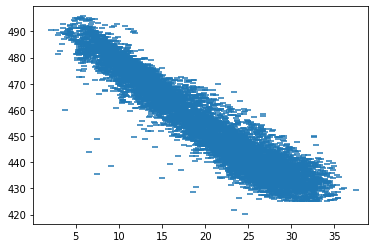

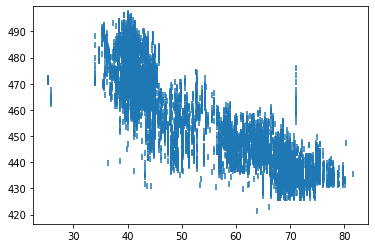

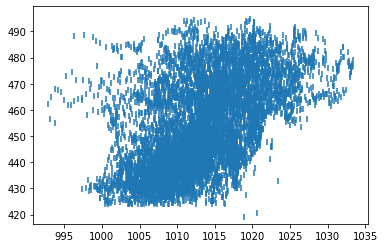

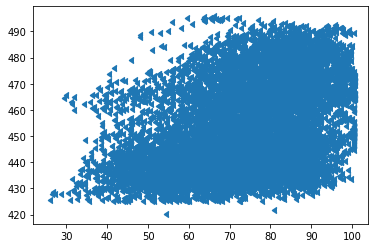

In [5]:
images_dir = '/content/gdrive/My Drive/2 Supervised Learning (Machine Learning Intro)/plotsW'
fig=plt.figure(1)
plt.scatter(df[["T"]],df[["EP"]],marker=1)
fig.savefig(f"{images_dir}/T.png")
fig2=plt.figure(2)
plt.scatter(df[["AP"]],df[["EP"]],marker=2)
fig2.savefig(f"{images_dir}/AP.png")
fig3=plt.figure(3)
plt.scatter(df[["RH"]],df[["EP"]],marker=3)
fig3.savefig(f"{images_dir}/RH.png")
fig4=plt.figure(4)
plt.scatter(df[["V"]],df[["EP"]],marker=4)
fig4.savefig(f"{images_dir}/V.png")

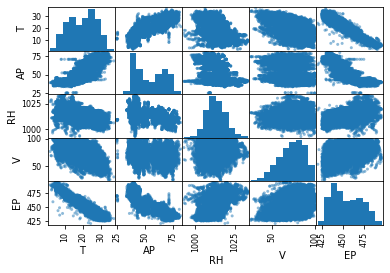

In [7]:
#pd.plotting.parallel_coordinates(df,"EP")
pd.plotting.scatter_matrix(df);

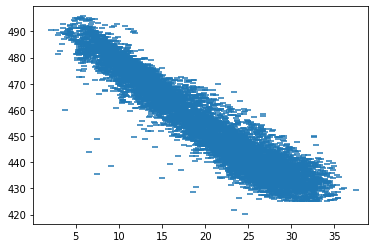

In [8]:
#this feature show a high relationship between Cement and strength
fig9=plt.figure(9)
plt.scatter(df[["T"]],df[["EP"]],marker=1)
fig.savefig(f"{images_dir}/CementxAge.png")

In [12]:
#split the data using the 80-20 rule
numberOfInstances=9568
fd_cement=df_x[["T"]]
x_train=fd_cement[:round(80*numberOfInstances/100)+10].to_numpy()
y_train=df_y[:round(80*numberOfInstances/100)+10].to_numpy()
x_test=fd_cement[round(80*numberOfInstances/100)-10:].to_numpy()
y_test=df_y[round(80*numberOfInstances/100)-10:].to_numpy()
print(y_train.shape[0])
print(x_test.shape[0])
print(y_test.shape[0])

7664
1924
1924


7664
[67440278.64679976]
[3378741.1789]
[150440.93]
[3482809.27000001]
[19.62955767]
[454.43753523]
[3.26219898e+09]
[-2.17484283]
[497.12873793]


Text(0.5, 1.0, 'Linear regression plot')

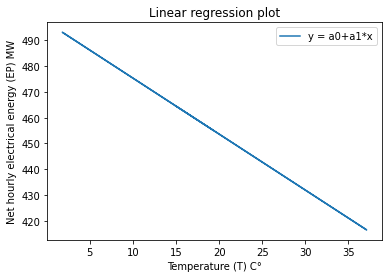

In [28]:
n=x_train.shape[0]
sum1=0
sum2=0
sum3=0
sum4=0
for x in range(n):
  sum1+=(x_train[x]*y_train[x])
  sum2+=x_train[x]*x_train[x]
  sum3+=x_train[x]
  sum4+=y_train[x]
print(n)
print(sum1)
print(sum2)
print(sum3)
print(sum4)
xhat=sum3/n
yhat=sum4/n
print(xhat)
print(yhat)
print(((n*sum2)-(sum3*sum3)))
a1=((n*sum1)-(sum3*sum4))/((n*sum2)-(sum3*sum3))
a0=yhat-(a1*xhat)
print(a1)
print(a0)
y=a0+a1*x_train
#plt.scatter(df[["T"]],df[["EP"]],marker=1)
plt.plot(x_train,y,label='y = a0+a1*x')
plt.xlabel('Temperature (T) C°')
plt.ylabel('Net hourly electrical energy (EP) MW')
plt.legend()
plt.title('Linear regression plot')


In [37]:
#queries
while(1):
  print("please provide a temperature to predict the Net hourly electrical energy")
  print("ranges from 1.81°C and 37.11°C")
  temp=float(input())
  res=a0+a1*temp
  print(res)

please provide a temperature to predict the Net hourly electrical energy
ranges from 1.81°C and 37.11°C
1.81
[493.19227241]
please provide a temperature to predict the Net hourly electrical energy
ranges from 1.81°C and 37.11°C
37.11
[416.42032062]
please provide a temperature to predict the Net hourly electrical energy
ranges from 1.81°C and 37.11°C
25.3
[442.10521441]
please provide a temperature to predict the Net hourly electrical energy
ranges from 1.81°C and 37.11°C


KeyboardInterrupt: ignored